In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import kagglehub
path = kagglehub.dataset_download("kanakbaghel/hospital-management-dataset")
print("Path to dataset files:", path)

100%|██████████| 11.1k/11.1k [00:00<00:00, 10.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kanakbaghel/hospital-management-dataset/versions/1


In [3]:
patients = pd.read_csv('/root/.cache/kagglehub/datasets/kanakbaghel/hospital-management-dataset/versions/1/patients.csv')
doctors = pd.read_csv('/root/.cache/kagglehub/datasets/kanakbaghel/hospital-management-dataset/versions/1/doctors.csv')
appointments = pd.read_csv('/root/.cache/kagglehub/datasets/kanakbaghel/hospital-management-dataset/versions/1/appointments.csv')
treatments = pd.read_csv('/root/.cache/kagglehub/datasets/kanakbaghel/hospital-management-dataset/versions/1/treatments.csv')
billing = pd.read_csv('/root/.cache/kagglehub/datasets/kanakbaghel/hospital-management-dataset/versions/1/billing.csv')

In [4]:
print(patients.head())
print(doctors.head())
print(appointments.head())
print(treatments.head())
print(billing.head())

  patient_id first_name last_name gender date_of_birth  contact_number  \
0       P001      David  Williams      F    1955-06-04      6939585183   
1       P002      Emily     Smith      F    1984-10-12      8228188767   
2       P003      Laura     Jones      M    1977-08-21      8397029847   
3       P004    Michael   Johnson      F    1981-02-20      9019443432   
4       P005      David    Wilson      M    1960-06-23      7734463155   

        address registration_date insurance_provider insurance_number  \
0   789 Pine Rd        2022-06-23       WellnessCorp        INS840674   
1  321 Maple Dr        2022-01-15        PulseSecure        INS354079   
2  321 Maple Dr        2022-02-07        PulseSecure        INS650929   
3    123 Elm St        2021-03-02        HealthIndia        INS789944   
4    123 Elm St        2021-09-29       MedCare Plus        INS788105   

                      email  
0   david.williams@mail.com  
1      emily.smith@mail.com  
2      laura.jones@mail.co

In [5]:
print(patients.info())
print(doctors.info())
print(appointments.info())
print(treatments.info())
print(billing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          50 non-null     object
 1   first_name          50 non-null     object
 2   last_name           50 non-null     object
 3   gender              50 non-null     object
 4   date_of_birth       50 non-null     object
 5   contact_number      50 non-null     int64 
 6   address             50 non-null     object
 7   registration_date   50 non-null     object
 8   insurance_provider  50 non-null     object
 9   insurance_number    50 non-null     object
 10  email               50 non-null     object
dtypes: int64(1), object(10)
memory usage: 4.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   doctor_id         1

In [6]:
print(patients.describe())
print(doctors.describe())
print(appointments.describe())
print(treatments.describe())
print(billing.describe())

       contact_number
count    5.000000e+01
mean     7.817283e+09
std      9.573594e+08
min      6.141952e+09
25%      7.065593e+09
50%      7.749927e+09
75%      8.599947e+09
max      9.900972e+09
       phone_number  years_experience
count  1.000000e+01           10.0000
mean   7.919716e+09           21.5000
std    1.142890e+09            6.7536
min    6.176384e+09            5.0000
25%    6.792438e+09           19.5000
50%    8.269752e+09           23.5000
75%    8.937722e+09           26.0000
max    9.118539e+09           28.0000
       appointment_id patient_id doctor_id appointment_date appointment_time  \
count             200        200       200              200              200   
unique            200         48        10              158               40   
top              A001       P012      D005       2023-08-16         11:00:00   
freq                1         10        29                5                9   

       reason_for_visit   status  
count               200 

In [8]:
appointments['appointment_date'] = pd.to_datetime(appointments['appointment_date'])
treatments['treatment_date'] = pd.to_datetime(treatments['treatment_date'])
billing['bill_date'] = pd.to_datetime(billing['bill_date'])

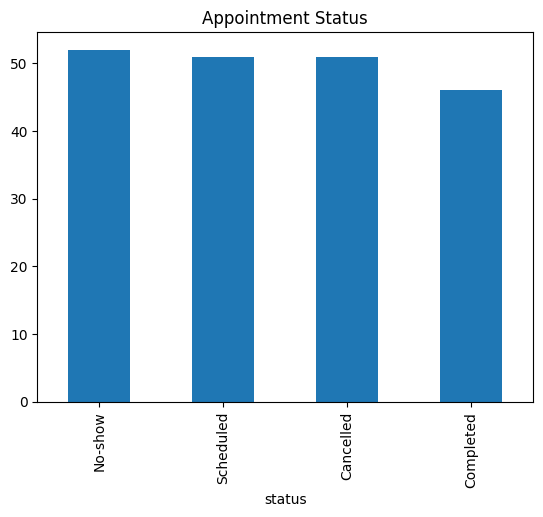

In [9]:
appointments['status'].value_counts().plot(kind='bar', title='Appointment Status')
plt.show()

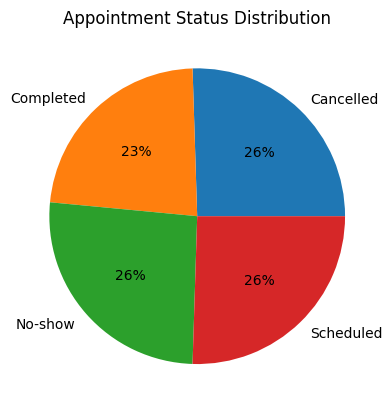

In [10]:
appointments.groupby('status').size().plot(kind='pie', autopct='%1.0f%%', title='Appointment Status Distribution')
plt.ylabel('')
plt.show()

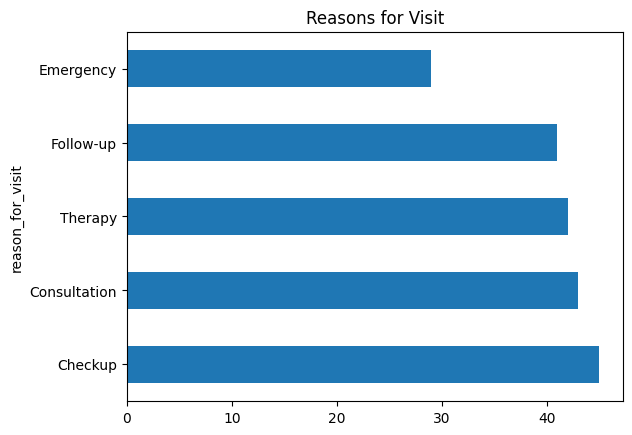

In [11]:
appointments['reason_for_visit'].value_counts().plot(kind='barh', title='Reasons for Visit')
plt.show()

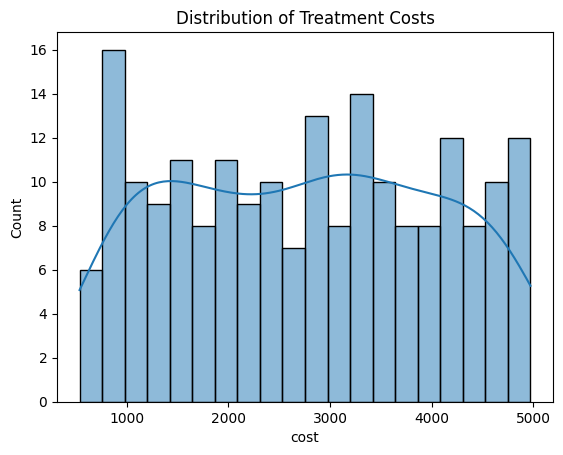

In [12]:
sns.histplot(treatments['cost'], bins=20, kde=True)
plt.title('Distribution of Treatment Costs')
plt.show()

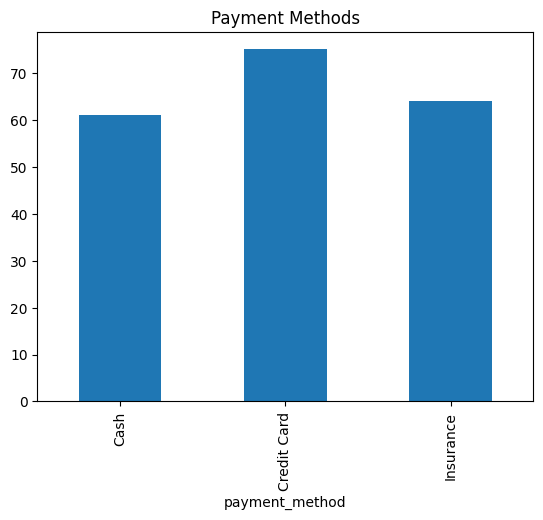

In [13]:
billing.groupby('payment_method').size().plot(kind='bar', title='Payment Methods')
plt.show()

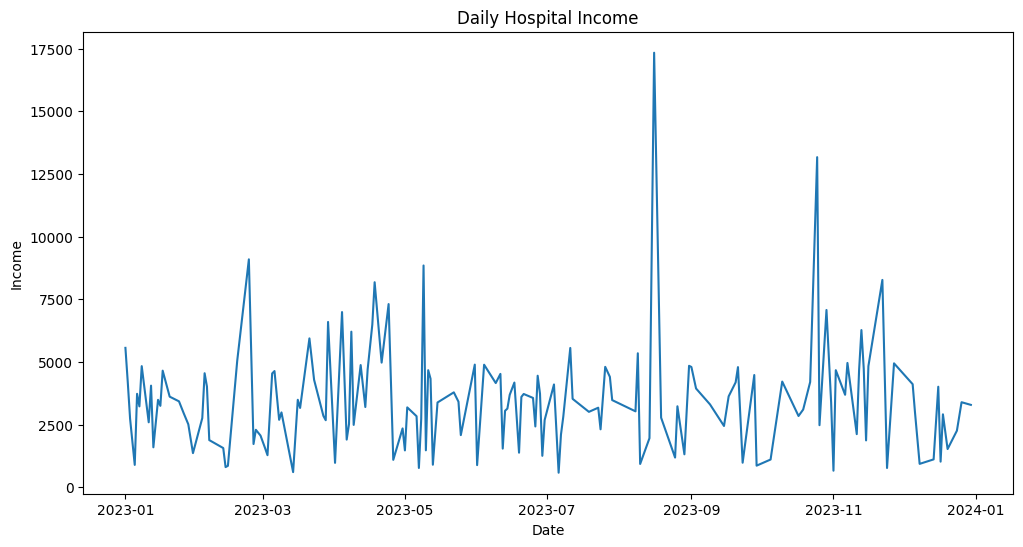

In [14]:
merged = appointments.merge(treatments, on='appointment_id').merge(billing, on='treatment_id')
daily_income = merged.groupby(merged['bill_date'].dt.date)['amount'].sum()
daily_income.plot(figsize=(12,6), title='Daily Hospital Income')
plt.xlabel('Date')
plt.ylabel('Income')
plt.show()

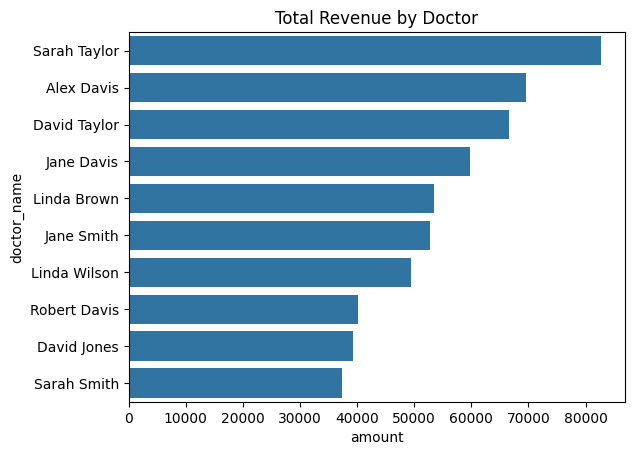

In [15]:
doctor_treatment = merged.groupby('doctor_id')['amount'].sum().reset_index()
doctor_treatment = doctor_treatment.merge(doctors[['doctor_id','first_name','last_name']], on='doctor_id')
doctor_treatment['doctor_name'] = doctor_treatment['first_name'] + ' ' + doctor_treatment['last_name']
doctor_treatment = doctor_treatment.sort_values(by='amount', ascending=False)
sns.barplot(data=doctor_treatment, x='amount', y='doctor_name')
plt.title('Total Revenue by Doctor')
plt.show()

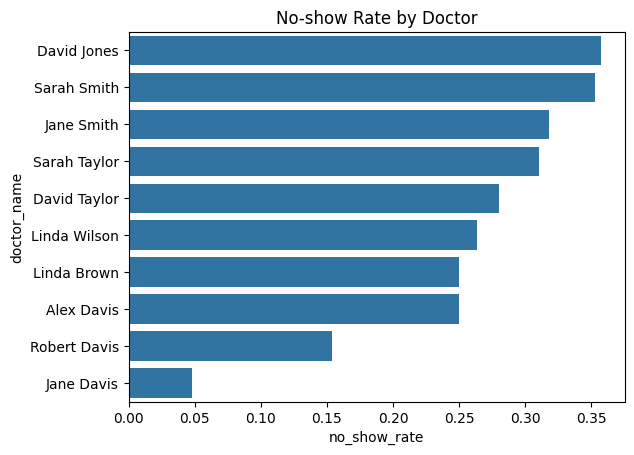

In [16]:
no_show_rate = appointments[appointments['status'] == 'No-show'].groupby('doctor_id').size().reset_index(name='no_shows')
total_appointments = appointments.groupby('doctor_id').size().reset_index(name='total')
no_show_data = no_show_rate.merge(total_appointments, on='doctor_id')
no_show_data['no_show_rate'] = no_show_data['no_shows'] / no_show_data['total']
no_show_data = no_show_data.merge(doctors[['doctor_id','first_name','last_name']], on='doctor_id')
no_show_data['doctor_name'] = no_show_data['first_name'] + ' ' + no_show_data['last_name']
no_show_data = no_show_data.sort_values(by='no_show_rate', ascending=False)
sns.barplot(data=no_show_data, x='no_show_rate', y='doctor_name')
plt.title('No-show Rate by Doctor')
plt.show()